### Basic deep learning with wine quality

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
wine = pd.read_csv('./datasets/wine_quality/WineQT.csv', index_col='Id')

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Normalize values and train_test_split

In [14]:
# Scale to [0,1]
max_ = wine.max(axis=0)
min_ = wine.min(axis=0)
df = (wine - min_) / (max_ - min_)
df.head()

X = df.drop(['quality',], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape
X_test.shape

(286, 11)

### Model

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [19]:
model.compile(
    optimizer='Adam',
    loss='mae',
)

#### Model fit

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size=256,
    epochs=10,
)

Epoch 1/10

4/4 [==============================] - 1s 46ms/step - loss: 0.3245 - val_loss: 0.1894
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1578 - val_loss: 0.1356
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1339 - val_loss: 0.1149
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1239 - val_loss: 0.1052
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1191 - val_loss: 0.0970
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1109 - val_loss: 0.0961
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1086 - val_loss: 0.0959
Epoch 8/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1058 - val_loss: 0.0938
Epoch 9/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1034 - val_loss: 0.0935
Epoch 10/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1028 - val_loss: 0.0922


<Axes: >

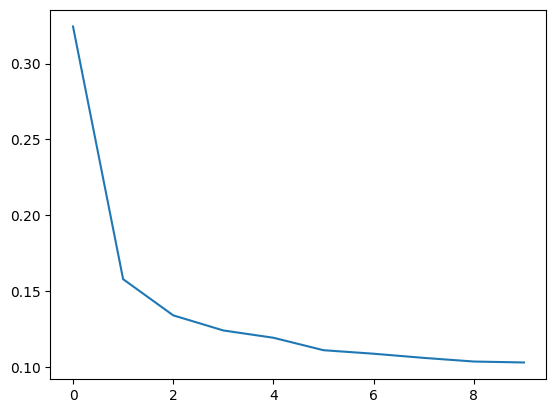

In [21]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()